### Imports

In [85]:
# Not sure if I'll need every single one of these imports. I'll do some cleaning afterwards.
import os
import pandas as pd
import numpy as np
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### Some notes for tomorrow...

##### Getting data ready
* ImageFolder -> DataLoader train, val, test
* Manageable chunk of data for visualization:
  * iter(DataLoader) -> images, labels = iter.next()
  * images = images.numpy() <- This might be required for display (Convert from PyTorch tensor to NumPy array)

##### Next up
* Device cuda
* Choose model (prolly some lightweight VGG or ResNet architecture)
* Loss and optim (CrossEntropyLoss and Adam, most likely)
* ...

### Loading the data and preparation

In this section we will load our images, transform images into PyTorch tensors and Standardize the pixel values.

For standardization we need Mean and Std. These were calculated in the other notebook: mean_and_std.ipynb

* Computed Mean: tensor([0.4737, 0.4721, 0.3989])
* Computed Std: tensor([0.2029, 0.2014, 0.2066])

In [76]:
mean = [0.4737, 0.4721, 0.3989]
std = [0.2029, 0.2014, 0.2066]

Our transformations

In [77]:
transform = transforms.Compose([
  # Images to PyTorch Tensors
  transforms.ToTensor(),
  # Standardization, usually leads to faster and better training (gradient properties)
  transforms.Normalize(mean, std)
])

Datasets

In [78]:
# Load data from folders, apply our transforms
train_data = datasets.ImageFolder('./data/train', transform=transform)
validation_data = datasets.ImageFolder('./data/valid', transform=transform)
test_data = datasets.ImageFolder('./data/test', transform=transform)

In [79]:
# Print some stats for each
print(f"Training - {len(train_data)} images with {len(train_data.classes)} classes")
print(f"Validation - {len(validation_data)} images with {len(validation_data.classes)} classes")
print(f"Test - {len(test_data)} images with {len(test_data.classes)} classes")

Training - 29274 images with 184 classes
Validation - 920 images with 184 classes
Test - 920 images with 184 classes


In [110]:
# Made a quick CSV that only has labels and corresponding class_ids
birds_df = pd.read_csv('./data/classids_to_labels.csv')
# Use this dataframe to make a dictionary for easy access
# First we set class id into index, then we only have 1 column left which is the labels
# to_dict() converts our selected 'labels' into a dictionary indexed by class id
birds_dict = birds_df.set_index('class id')['labels'].to_dict()


Dataloaders, automating the process of loading batches of data

In [82]:
batch_size = 64

# 64 batch size and add some shuffle because our data is alphabetically ordered
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [83]:
# Check that our X and y are correct shapes
for X, y in train_loader:
    print(f"Shape of X [batch_size, channels, height, width]: {X.shape}")
    print(f"Shape of y [label(int)]: {y.shape}")
    break

Shape of X [batch_size, channels, height, width]: torch.Size([64, 3, 224, 224])
Shape of y [label(int)]: torch.Size([64])


##### Let's take a look

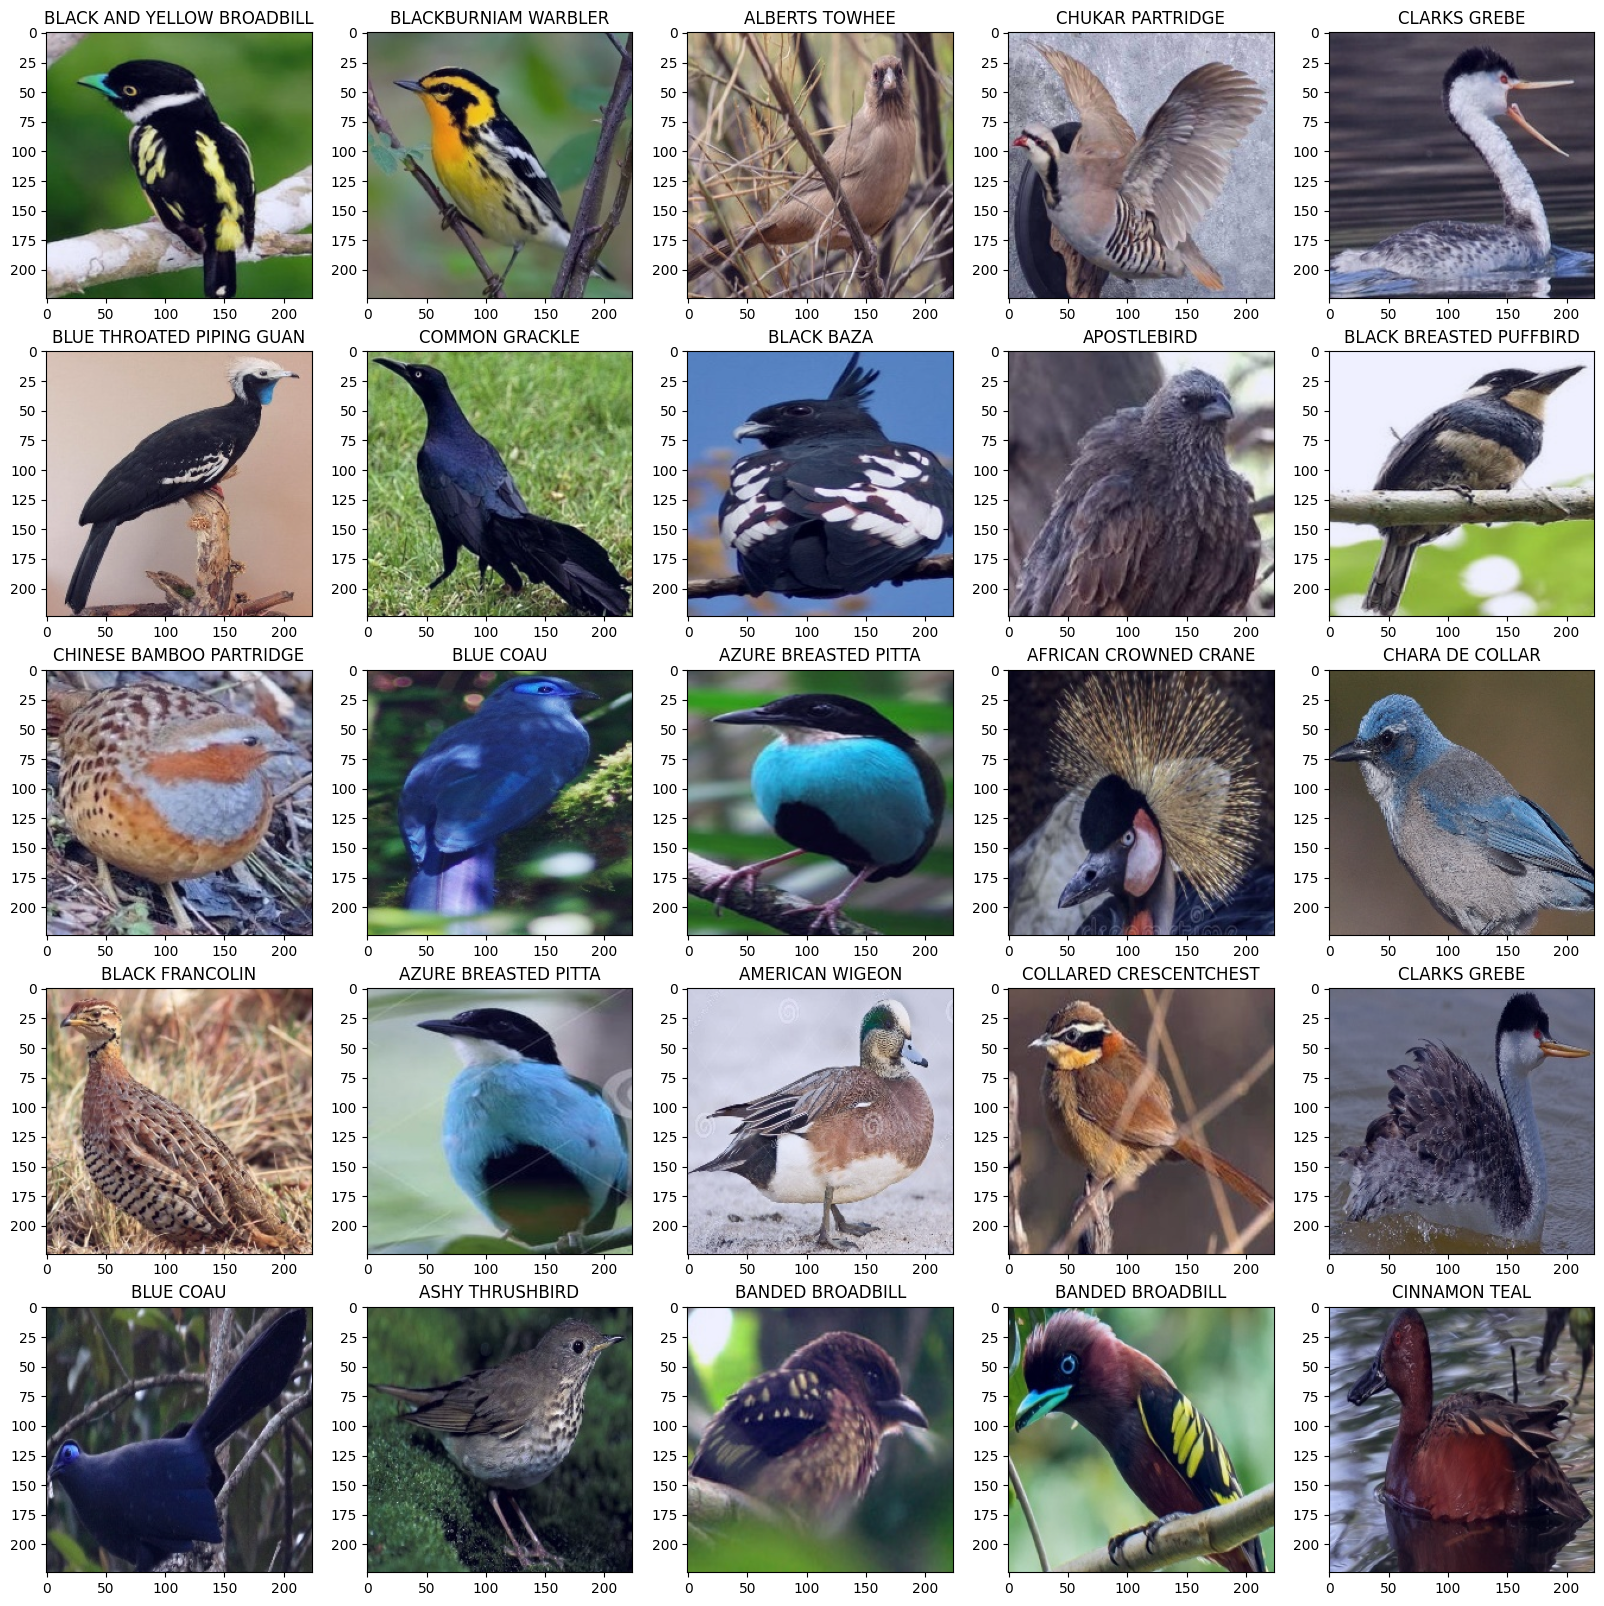

In [112]:
# Visualize some images
# Note: images[i] is a torch tensor in format [Channels, Height, Width] and needs to be changed to [Height, Width, Channels] 
for images, labels in train_loader:
  fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,20))

  for i, ax in enumerate(axes.flatten()):
    # This swaps the format to [Height, Width, Channels] for visualizing
    img = images[i].permute(1,2,0)
    # Change our standardization into minmax normalization for original colors
    img = (img - img.min()) / (img.max() - img.min())

    ax.imshow(img)
    
    # Here we get the class id with labels[i].item()
    # Then we map that id into the corresponding label using birds_dict
    ax.set_title(birds_dict[labels[i].item()])

  plt.show()
  break


In [84]:
# GPU cuda > CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')